In [327]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

# reading the dataset

In [161]:
df_initial = pd.read_csv('diabetes.csv')
df_initial

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [162]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EDA

In [202]:
df_initial.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,72.341146,12.099900,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [186]:
print('total women with diabetes =',len(df_initial[df_initial['Outcome'] == 1]),'out of',len(df_initial))

total women with diabetes = 268 out of 768


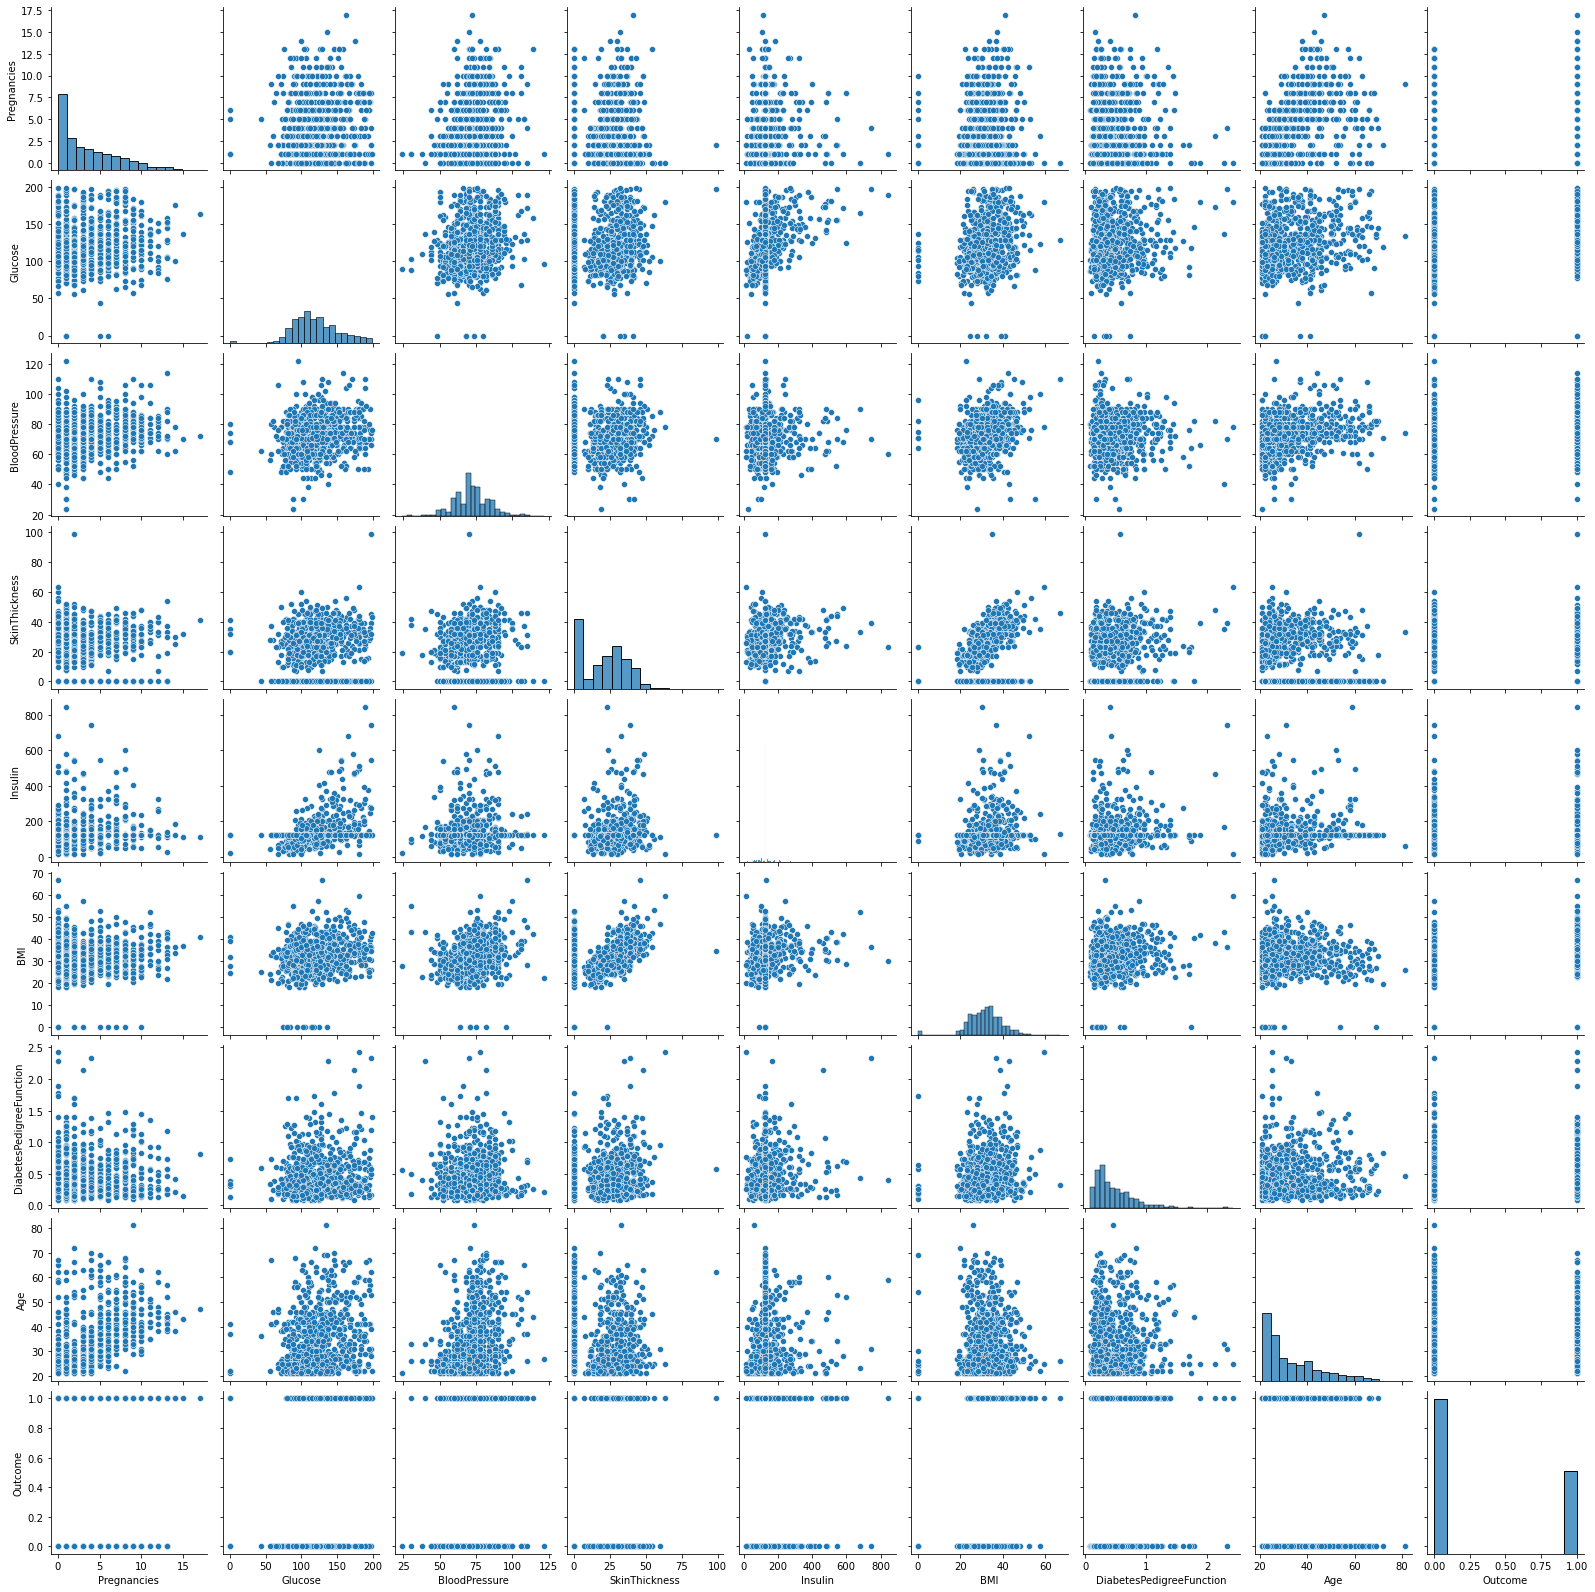

In [200]:
#I try to find the correlation of each feature that might lead to diabetes in the diabetic patients
sns.pairplot(df_initial)

Pair plot analysis
1. the diagonal shows the distribution(histogram) of each feature -
    i) pregnancy,insulin,DPF,age,skin thickness is skewed
   ii) BMI,BP,Glucose is normally distributed
  iii) outcome is binary (0- false, 1-true)
2. Age, glucose, BMI, pregnancy all have positive correlation with the outcome being 1 (dependency)

<AxesSubplot:>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208802,-0.081672,0.025047,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.218177,0.057328,0.409283,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.208802,0.218177,1.000000,0.012432,0.046035,0.237280,-0.001428,0.325638,0.164823
SkinThickness,-0.081672,0.057328,0.012432,1.000000,0.183368,0.392573,0.183928,-0.113970,0.074752
Insulin,0.025047,0.409283,0.046035,0.183368,1.000000,0.170060,0.126503,0.097101,0.203790
BMI,0.017683,0.221071,0.237280,0.392573,0.170060,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,-0.001428,0.183928,0.126503,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.325638,-0.113970,0.097101,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.164823,0.074752,0.203790,0.292695,0.173844,0.238356,1.000000


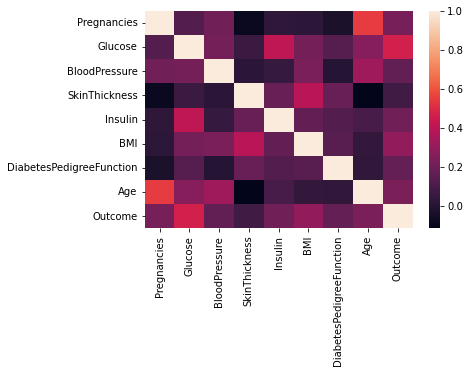

In [208]:
display(sns.heatmap(df_initial.corr()))
display(df_initial.corr())

there is a positive correlation between pregnancy and diabetes

I check for outliers in any feature to scale the data accordingly

In [215]:
df_initial.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

# Data cleaning

## replacing null values

In [241]:
invl = np.array(df_initial[(df_initial['BloodPressure']==0) | (df_initial['Insulin']==0) | (df_initial['BMI']==0) | (df_initial['Glucose']==0)|(df_initial['SkinThickness']==0)].index)
invl

array([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,  22,  26,  29,
        33,  36,  41,  44,  46,  49,  58,  60,  61,  62,  64,  67,  72,
        75,  76,  78,  81,  84,  90,  93, 100, 101, 102, 104, 106, 113,
       115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 145, 148, 151,
       154, 164, 167, 168, 170, 176, 178, 179, 180, 182, 183, 184, 190,
       192, 193, 196, 201, 207, 219, 221, 222, 226, 230, 233, 235, 239,
       242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 274, 278, 280,
       283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336,
       337, 339, 342, 343, 344, 347, 349, 350, 351, 354, 355, 361, 363,
       366, 371, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418,
       426, 430, 433, 435, 437, 439, 443, 451, 453, 456, 461, 464, 468,
       473, 474, 484, 489, 494, 495, 496, 502, 505, 509, 512, 513, 517,
       518, 522, 523, 524, 529, 531, 533, 535, 536, 537, 552, 557, 559,
       560, 564, 570, 571, 577, 578, 583, 586, 587, 589, 592, 59

DiabetesPedigreeFunction: Based on family history, it is a numerical score that determines the genetic risk of diabetes. It considers the prevalence of diabetes among relatives to assess an individual's likelihood of developing the condition

source : gfg

Blood pressure cannot be 0, insulin cannot be 0, bMI cannot be 0, glucose cannot be 0, skin thickness cannot be 0
so these are invalid values or missing data- since it is almost half the data, we cannot drop it,
so I can fill these values using mean,median or mode depending on type of distribution.

In [242]:
#I study the values of exsisting data, to find type of distribution
df_notnull = df_initial.drop(invl)
df_notnull

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,125,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


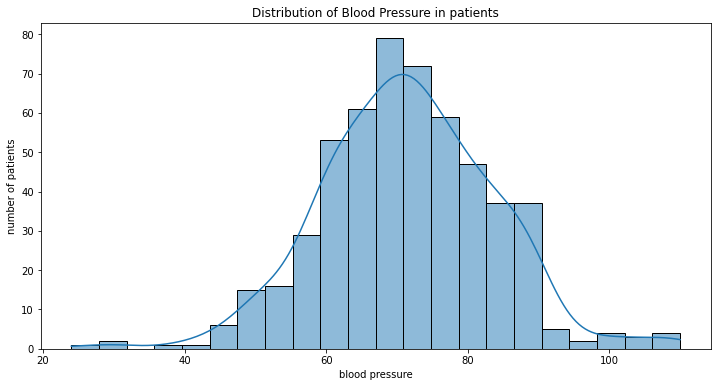

In [243]:
plt.figure(figsize = (12,6))
sns.histplot(df_notnull['BloodPressure'], kde = True)
plt.title('Distribution of Blood Pressure in patients')
plt.xlabel('blood pressure')
plt.ylabel('number of patients')
plt.show()

the graph shows a normal distribution, I plot a similar graph to study insulin values now

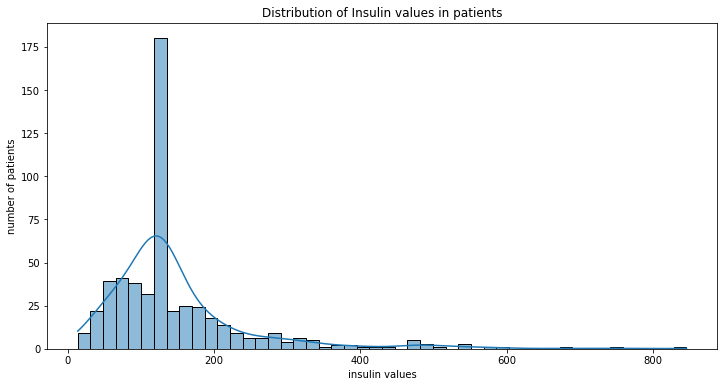

In [244]:
plt.figure(figsize = (12,6))
sns.histplot(df_notnull['Insulin'], kde = True)
plt.title('Distribution of Insulin values in patients')
plt.xlabel('insulin values')
plt.ylabel('number of patients')
plt.show()

it is evident that insulin is right skewed

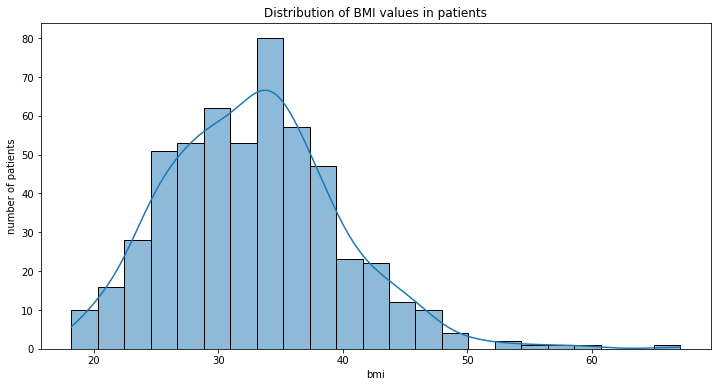

In [245]:
plt.figure(figsize = (12,6))
sns.histplot(df_notnull['BMI'], kde = True)
plt.title('Distribution of BMI values in patients')
plt.xlabel('bmi')
plt.ylabel('number of patients')
plt.show()

bmi graph is right skewed 


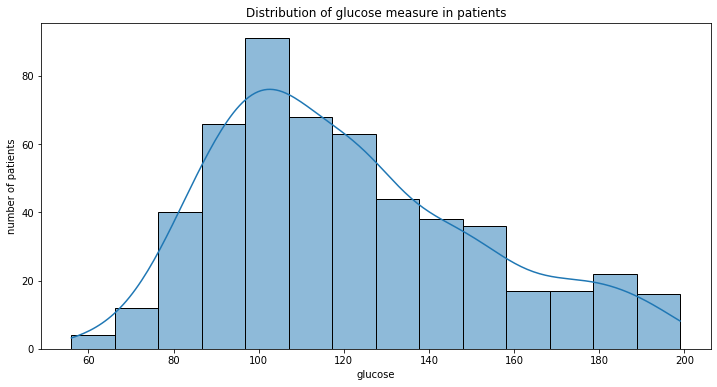

In [246]:
plt.figure(figsize = (12,6))
sns.histplot(df_notnull['Glucose'], kde = True)
plt.title('Distribution of glucose measure in patients')
plt.xlabel('glucose')
plt.ylabel('number of patients')
plt.show()

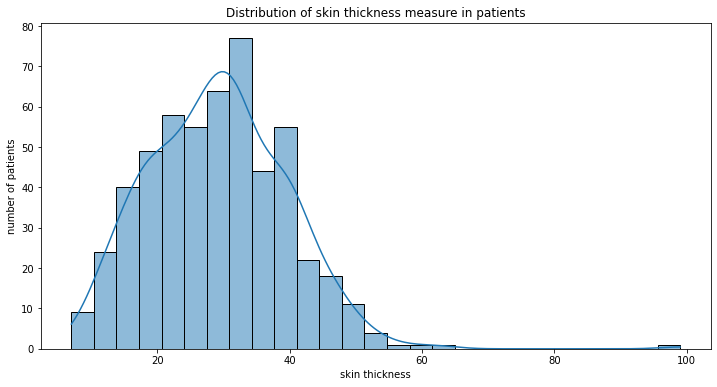

In [247]:
plt.figure(figsize = (12,6))
sns.histplot(df_notnull['SkinThickness'], kde = True)
plt.title('Distribution of skin thickness measure in patients')
plt.xlabel('skin thickness')
plt.ylabel('number of patients')
plt.show()

I decide to replace blood pressure, glucose null values with mean and bmi,insulin, skin thickness null values with the median

In [170]:
mean_bp = df_notnull['BloodPressure'].mean()
mean_bp = int(np.round(mean_bp))
mean_bp

71

In [171]:
median_insulin =int(np.round((df_notnull['Insulin'].median())))
median_insulin

125

In [249]:
df_initial['Glucose'].replace(0,int(np.round(df_notnull['Glucose']).mean()),inplace = True)

In [253]:
df_initial['BloodPressure'].replace(0,mean_bp,inplace = True)
df_initial['Insulin'].replace(0,median_insulin,inplace = True)
df_initial['BMI'].replace(0,int(np.round((df_notnull['BMI'].median()))),inplace = True)
df_initial['SkinThickness'].replace(0,int(np.round((df_notnull['SkinThickness'].median()))),inplace = True)

In [254]:
(df_initial == 0).any()

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

All the missing values have been dealt with

In [260]:
df_cleaned = df_initial.copy(deep=True)

## scaling the outliers

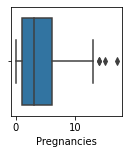

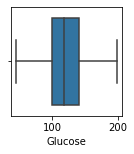

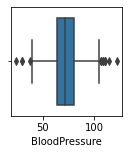

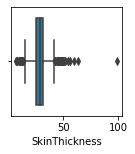

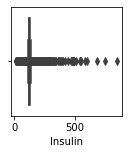

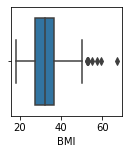

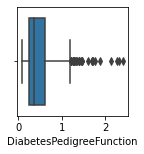

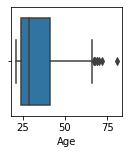

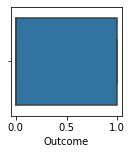

In [255]:
for i in df_initial.columns.tolist():
    plt.figure(figsize =(2,2))
    sns.boxplot(x= i, data =df_initial)
    plt.show()

the bmi,dpf,age features seem to have many outliers
I consider age feature to be genuine and do not scale it,
the bmi, insulin however, needs to be scaled

In [267]:
scaler = StandardScaler()

scaler.fit(df_cleaned.drop('Outcome',axis = 1))
scaled_features = scaler.transform(df_cleaned.drop('Outcome',axis =1))
df_scaled = pd.DataFrame(scaled_features,columns = df_cleaned.columns[:-1])
df_scaled['Outcome'] = df_cleaned['Outcome']

In [268]:
df_scaled #standardized data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865461,-0.028212,0.670643,-0.181541,0.165153,0.468492,1.425995,1
1,-0.844885,-1.205788,-0.524407,-0.012301,-0.181541,-0.853625,-0.365061,-0.190672,0
2,1.233880,2.016154,-0.689806,-0.012301,-0.181541,-1.333906,0.604397,-0.105584,1
3,-0.844885,-1.074281,-0.524407,-0.695245,-0.540642,-0.635315,-0.920763,-1.041549,0
4,-1.141852,0.503814,-2.674586,0.670643,0.316566,1.547781,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679757,0.302584,2.150354,0.455573,0.063276,-0.908682,2.532136,0
764,-0.547919,0.010659,-0.193611,-0.239949,-0.181541,0.630881,-0.398282,-0.531023,0
765,0.342981,-0.022218,-0.028212,-0.695245,-0.332132,-0.911840,-0.685193,-0.275760,0
766,-0.844885,0.142167,-1.020602,-0.012301,-0.181541,-0.344236,-0.371101,1.170732,1


# deciding element-dependancy

In [273]:
x = df_scaled.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865461,-0.028212,0.670643,-0.181541,0.165153,0.468492,1.425995
1,-0.844885,-1.205788,-0.524407,-0.012301,-0.181541,-0.853625,-0.365061,-0.190672
2,1.233880,2.016154,-0.689806,-0.012301,-0.181541,-1.333906,0.604397,-0.105584
3,-0.844885,-1.074281,-0.524407,-0.695245,-0.540642,-0.635315,-0.920763,-1.041549
4,-1.141852,0.503814,-2.674586,0.670643,0.316566,1.547781,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679757,0.302584,2.150354,0.455573,0.063276,-0.908682,2.532136
764,-0.547919,0.010659,-0.193611,-0.239949,-0.181541,0.630881,-0.398282,-0.531023
765,0.342981,-0.022218,-0.028212,-0.695245,-0.332132,-0.911840,-0.685193,-0.275760
766,-0.844885,0.142167,-1.020602,-0.012301,-0.181541,-0.344236,-0.371101,1.170732


In [276]:
y = df_scaled['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Train test split

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

# Applying the machine learning models

## Logistic Regression

In [287]:
LRmodel = LogisticRegression()
LRmodel.fit(x_train,y_train)
predictions = LRmodel.predict(x_test)  

### Evaluation

In [312]:
report_lr = (classification_report(y_test,predictions,output_dict = True))
print(report_lr)

{'0': {'precision': 0.801980198019802, 'recall': 0.81, 'f1-score': 0.8059701492537313, 'support': 100.0}, '1': {'precision': 0.6415094339622641, 'recall': 0.6296296296296297, 'f1-score': 0.6355140186915887, 'support': 54.0}, 'accuracy': 0.7467532467532467, 'macro avg': {'precision': 0.7217448159910331, 'recall': 0.7198148148148149, 'f1-score': 0.72074208397266, 'support': 154.0}, 'weighted avg': {'precision': 0.7457112288048213, 'recall': 0.7467532467532467, 'f1-score': 0.746199817757915, 'support': 154.0}}


In [294]:
print(confusion_matrix(y_test,predictions))

[[85 15]
 [23 31]]


## Random Forest Classifier

In [300]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictionsrf = rf.predict(x_test)  

### Evaluation

In [311]:
report_rf = (classification_report(y_test,predictionsrf,output_dict = True))
print(report_rf)

{'0': {'precision': 0.7821782178217822, 'recall': 0.79, 'f1-score': 0.7860696517412935, 'support': 100.0}, '1': {'precision': 0.6037735849056604, 'recall': 0.5925925925925926, 'f1-score': 0.5981308411214953, 'support': 54.0}, 'accuracy': 0.7207792207792207, 'macro avg': {'precision': 0.6929759013637213, 'recall': 0.6912962962962963, 'f1-score': 0.6921002464313943, 'support': 154.0}, 'weighted avg': {'precision': 0.7196207491369083, 'recall': 0.7207792207792207, 'f1-score': 0.72016902983565, 'support': 154.0}}


In [303]:
print(confusion_matrix(y_test,predictionsrf))

[[79 21]
 [22 32]]


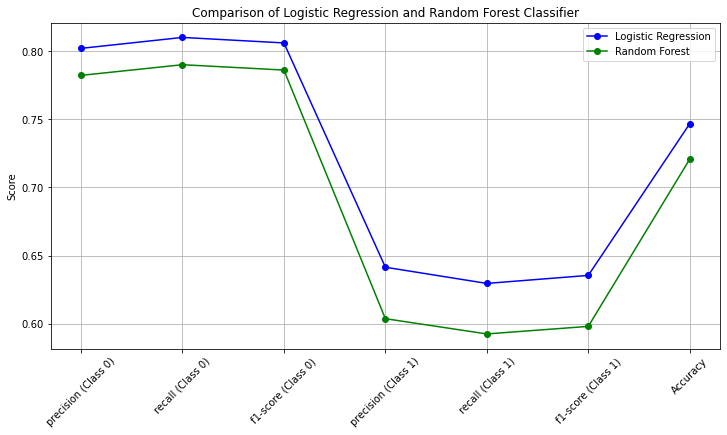

In [313]:

metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

logistic_values = [report_lr[cls][metric] for cls in classes for metric in metrics]
logistic_values.append(report_lr['accuracy'])

random_forest_values = [report_rf[cls][metric] for cls in classes for metric in metrics]
random_forest_values.append(report_rf['accuracy'])


metric_labels = [f'{metric} (Class {cls})' for cls in classes for metric in metrics] + ['Accuracy']

plt.figure(figsize=(12, 6))
plt.plot(metric_labels, logistic_values, marker='o', label='Logistic Regression', color='b')
plt.plot(metric_labels, random_forest_values, marker='o', label='Random Forest', color='g')
plt.title('Comparison of Logistic Regression and Random Forest Classifier')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


the accuracy of logistic regression is slightly higher than random forest classifier

In [335]:
feature_names = [df_scaled.columns[:-1]]

def predict_diabetes():
    print("Enter the following details for diabetes prediction:")
    user_input = []
    
    for feature in feature_names:
        user_input = input("Enter the values separated by commas: ").split(',')
        user_input = [float(x) for x in user_input]

    user_input = np.array(user_input).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input)
    

    prediction_lr = LRmodel.predict(user_input_scaled)

    print("\n Results :")
    print(f"{'You could have Diabetics, schedule a test with your doctor' if prediction_lr[0] == 1 else 'Low chances of diabetics, stay fit and schedule regular checkups'}")
predict_diabetes()


Enter the following details for diabetes prediction:
Enter the values separated by commas: 0,120,75,20,80.00,29.0,0.5,30

 Results :
Low chances of diabetics, stay fit and schedule regular checkups
